## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

x_train.shape, x_test.shape

((195, 7), (49, 7))

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [4]:
y_train = x_train['f1']
y_test = x_test['f1']
x_train = x_train.drop('f1', axis=1)
x_test = x_test.drop('f1', axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso


scaller = MinMaxScaler()
scaller.fit(x_train)
x_train = scaller.transform(x_train)
x_test = scaller.transform(x_test)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print('R^2 score для обычной регрессии:', lin_reg.score(x_test, y_test))

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(x_train, y_train)
print('R^2 score с L1 регуляризацией:', lasso_reg.score(x_test, y_test))

R^2 score для обычной регрессии: 0.143801418571
R^2 score с L1 регуляризацией: 0.218841885421


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [21]:
print('Коэффициенты обычной регрессии:', lin_reg.coef_) 
print('Коэффициенты регрессии с L1 регуляризацией:', lasso_reg.coef_)
lasso_reg.get_params()

Коэффициенты обычной регрессии: [ 5.1816019   0.02462375  0.58129719  0.05283043  1.47427916  0.41542842]
Коэффициенты регрессии с L1 регуляризацией: [ 4.9525982  -0.          0.26771569  0.          0.85247998  0.        ]


{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

__Ответ:__ По итогу получается, что коэффициенты моделей не сильно большие числа, а также не на сильно много отличаются друг от друга. Также можно заметить, что регулярзатор `L1` сделал свое дело и занулил 3 признака (если быть точнее `f2`, `f4` и `f6`) при использоваие `Lasso()`. Можно также заметить, что `GridSearchCV()` мы смогли подобрать параметр `alpha` 

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

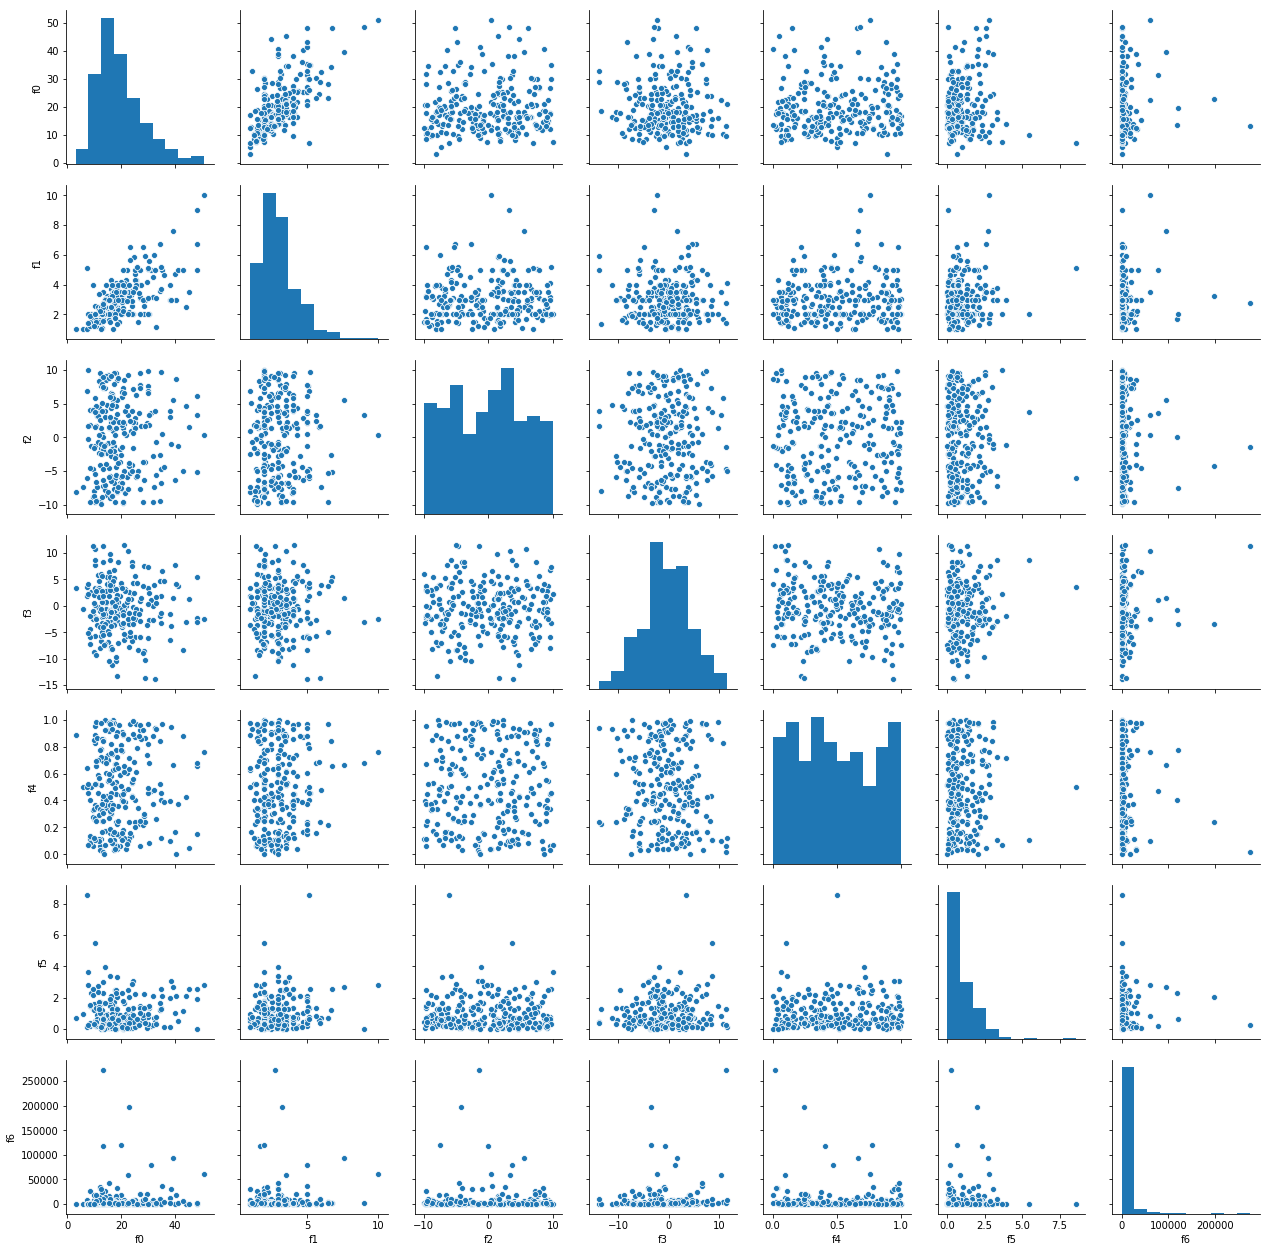

In [23]:
import seaborn as sns


sns.pairplot(df)


__Ответ:__ Если приглядеться к графикам зависимости целевой переменной `f1` и признаков `f2`, `f4` и `f6`, то можно заметить некоторую особенность. Признаки `f2`, `f4` и `f6` находятся в основном в одном диапозоне по отношению к целевой переменной ( от `0` до `6`), но как таковой явной зависимости между признаками не наблюдается

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/12233351/

In [475]:
from sklearn.base import BaseEstimator

class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-4):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.h = 0
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        l = X.shape[0]
        d = X.shape[1]
        
        
        self.loss_history = np.array([])
        for epoch in range(self.max_iter):            
            if self.gd_type == 'stochastic':
                sample = np.random.randint((X.shape[0]-1))
                grad = self.calc_gradient(X[sample].reshape(1,6), y[sample])
            else:
                grad = self.calc_gradient(X, y)
            
            cost = self.calc_loss(X, y)
            self.loss_history = np.append(self.loss_history, cost) 
            
            if self.w is None:
                if self.alpha == 0:
                    w = self.w0 - (self.eta * grad)
                else:
                    h = self.alpha*self.h + (self.eta*grad)
                    self.h = h
                    w = self.w0 - self.h
                    
                if np.linalg.norm(w - self.w0) < self.tolerance:
                    self.w = w
                    break
                else:
                    self.w = w          


            else:
                if self.alpha == 0:
                    w = self.w - (self.eta * grad)
                else:
                    h = self.alpha*self.h + (self.eta*grad)
                    self.h = h
                    w = self.w - self.h
            
                if np.linalg.norm(w - self.w) < self.tolerance:
                    self.w = w
                    break
                else:
                    self.w = w          

                       
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        else:
            
            return np.dot(X, self.w)
        
        
    def calc_gradient(self, X, y):
        l = X.shape[0]
        d = X.shape[1]
        
        
        X = np.array(X)
        y = np.array(y)
                
        if self.w is None:
            a = (np.dot(X,self.w0) - y).reshape((-1, 1))
        else:
            a = (np.dot(X,self.w) - y).reshape((-1, 1))
            
        gradient = np.zeros(d)
            
        bigger = np.where(np.abs(a) <= self.delta)
        least = np.where(np.abs(a) > self.delta)
        
       
        gradient = 0       
        if bigger[0].shape[0]:
            gradient = np.sum((a[bigger].reshape((-1, 1)) * X[bigger[0], :]), axis=0)
            
        if least[0].shape[0]:
            gradient += np.sum((np.sign(a[least].reshape((-1, 1))) * X[least[0], :] * self.delta), axis=0)
        
        
        return gradient / len(gradient)
        
    
        

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        
        def vec_func(difference, y, a):
            return np.vectorize(loss_for_el)(difference, y, a)

        def loss_for_el(difference, y, a):
            if difference <= self.delta:
                return ((y-a)**2)/2
            else:
                return self.delta*np.abs(y-a) - (self.delta**2)/2
            
        l = X.shape[0]
        d = X.shape[1]
        
        if self.w is None:
            a = np.dot(X, self.w0)
        else:
            a = np.dot(X, self.w)
            
        difference = np.abs(y-a)
        loss = vec_func(difference, y, a)

        return np.sum(loss) / l
        

In [451]:
w0 = np.array([1,2,3,4,5,6])
model = HuberReg(delta=1.0, gd_type='full', 
                 tolerance=1e-4, max_iter=10000, w0=w0, alpha=0, eta=1e-4)

model.fit(x_train, y_train)


HuberReg(alpha=0, delta=1.0, eta=0.0001, gd_type='full', max_iter=10000,
     tolerance=0.0001, w0=array([1, 2, 3, 4, 5, 6]))

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [467]:
w0 = np.array([1,2,3,4,5,6])

params = {'alpha': np.logspace(-6, -1, 5),
          'max_iter': [1000, 5000, 10000, 12000, 15000]}

r2_iter = np.array([])
r2_alpha = np.array([])
for i in range(len(params['alpha'])):
    # for max_iter
    
    model = HuberReg(gd_type='full', max_iter=params['max_iter'][i], w0=w0)
    model.fit(x_train, y_train)
    
    error1 = r2_score(y_test, model.predict(x_test))
    r2_iter = np.append(r2_iter, error1)
    
    # for alpha
    
    model = HuberReg(gd_type='full', w0=w0, alpha=params['alpha'][i])
    model.fit(x_train, y_train)
    
    error2 = r2_score(y_test, model.predict(x_test))
    r2_alpha = np.append(r2_alpha, error2)
    
    


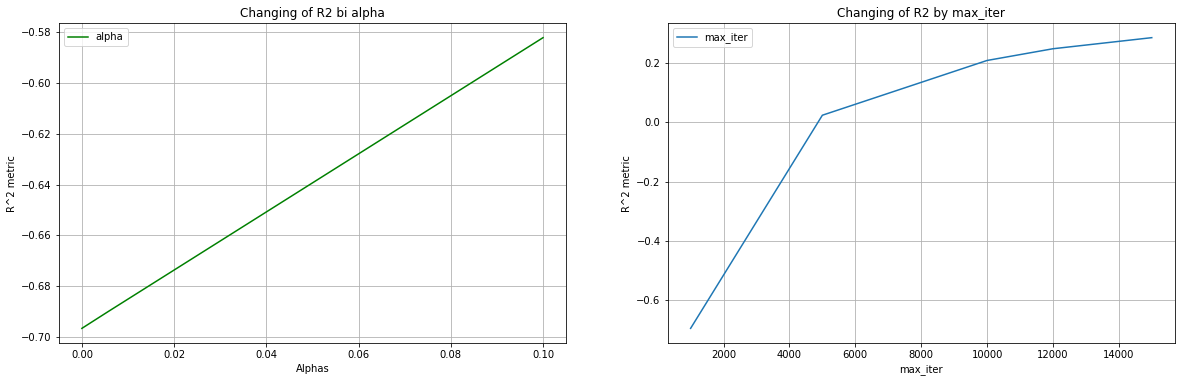

In [473]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(321)
ax1.plot(params['alpha'], r2_alpha, label=u"alpha", c='green')
plt.title(u"Changing of R2 bi alpha")
plt.xlabel(u"Alphas")
plt.ylabel(u"R^2 metric")
plt.grid()
plt.legend()

ax2 = fig.add_subplot(322)
ax2.plot(params['max_iter'], r2_iter, label=u"max_iter")
plt.title(u"Changing of R2 by max_iter")
plt.xlabel(u"max_iter")
plt.ylabel(u"R^2 metric")
plt.grid()
plt.legend()

plt.show()

__Итог__: Касательно параметра `max_iter` - как и ожидалось, при увеличении кол-во итераций повышается и качество модели, так как время для сходимости становится больше. Касательно параметра `alpha` - так же было ожидаемо, что при увеличении этого параметра ошибка будет снижаться

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

In [506]:
w0 = np.linspace(-1, 8, 6)

modelFull = HuberReg(gd_type='full',tolerance=1e-4, max_iter=10000, w0=w0, eta=1e-4)
modelStoc = HuberReg(gd_type='stochastic', tolerance=1e-4, max_iter=10000, w0=w0, eta=1e-4)
modelFullAlpha = HuberReg(gd_type='full', max_iter=10000, w0=w0, alpha=1e-6)

modelStoc.fit(x_train, y_train)
modelFull.fit(x_train, y_train)
modelFullAlpha.fit(x_train, y_train)


HuberReg(alpha=1e-06, delta=1.0, eta=0.0001, gd_type='full', max_iter=10000,
     tolerance=0.0001, w0=array([-1. ,  0.8,  2.6,  4.4,  6.2,  8. ]))

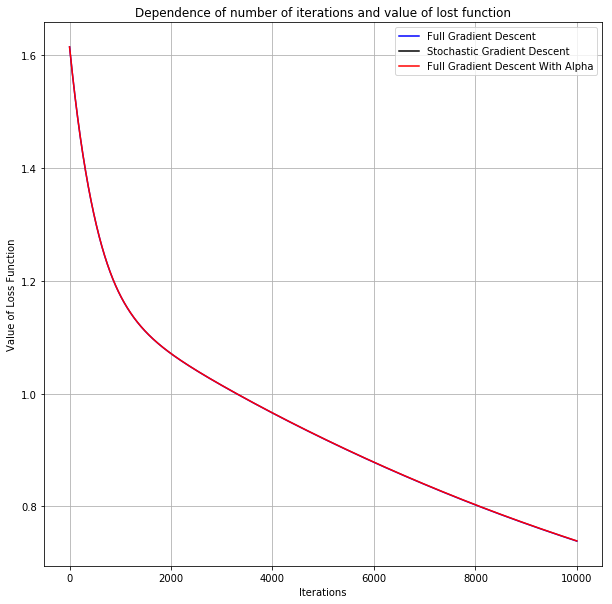

In [528]:
iter1 = [i for i in range(len(modelFull.loss_history))]
iter2 = [i for i in range(len(modelStoc.loss_history))]
iter3 = [i for i in range(len(modelFullAlpha.loss_history))]

plt.figure(figsize=(10,10))

plt.plot(iter1, modelFull.loss_history, label=u'Full Gradient Descent', c='blue')
plt.plot(iter2, modelStoc.loss_history, label=u'Stochastic Gradient Descent', c='black')
plt.plot(iter3, modelFullAlpha.loss_history, label=u'Full Gradient Descent With Alpha', c='red')

# plt.margins(x=0, y=)
plt.title(u'Dependence of number of iterations and value of lost function')
plt.xlabel(u'Iterations')
plt.ylabel(u'Value of Loss Function')
plt.grid()
plt.legend()

plt.show()

__Пояснение:__ По графику по сути видно, что скорость сходимости полного градиентного спуска и градиентного спуска с параметром `alpha` практически идентичны (в это можно убедиться если посмотреть `loss_history` обеих моделей). Что же касается стохастичсекого градиентного спуска, то данный алгоритм быстро сошелся, после одной итерации (что очень странно)

In [529]:
print('loss_histore для полного градиентногос спуска:', modelFull.loss_history)
print('loss_history для полного градиентного спуска с параметром alpha:', modelFullAlpha.loss_history)

loss_histore для полного градиентногос спуска: [ 1.61499975  1.61411089  1.61322251 ...,  0.7383152   0.73828562
  0.73825605]
loss_history для полного градиентного спуска с параметром alpha: [ 1.61499975  1.61411089  1.6132234  ...,  0.7386107   0.73858113
  0.73855156]
